In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
#df = pd.read_csv('/mnt/DATA/ML/training/keras/clickbait/server/scores-together.txt', sep='\t')

def parameter_string_to_dict(parameters):
    parameters_list = (' ' + parameters).split(' --')[1:]
    parameters_dict = dict([p.split(' ') for p in parameters_list])
    return parameters_dict

def read_scores(path, marker):
    df_scores = pd.read_csv(path, sep='\t', 
                     names=['time', 'val_mean_squared_error', 'epochs', 'parameters'], 
                     converters={'time': (lambda x: x.split(': ')[1]),
                                 'val_mean_squared_error': (lambda x: float(x.split(': ')[1])), 
                                 'epochs': (lambda x: x.split(': ')[1]), 
                                 'parameters': (lambda x: parameter_string_to_dict(x.split(': ')[1]))}
                    )
    df_scores['marker'] = marker
    df_params = pd.DataFrame(df_scores['parameters'].tolist())
    del df_scores['parameters']
    return pd.concat([df_scores, df_params], axis=1)

In [14]:
#base_path = '/mnt/DATA/ML/training/keras/clickbait/server'
base_path = os.getcwd()
df_wimages = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2.orig.txt'),
                         marker='inceptionresnetv2')
df_noimages = read_scores(path=os.path.join(base_path, 'scores-noimages.orig.txt'),
                         marker='noimage')
df_wimages_big = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2-big.orig.txt'),
                         marker='inceptionresnetv2-big')
df_noimages_big = read_scores(path=os.path.join(base_path, 'scores-noimages-big-part.orig.txt'),
                         marker='None-big')

df = pd.concat([
    #df_wimages, 
    #df_noimages, 
    df_wimages_big, 
    df_noimages_big
], sort=False)

# remove outliers
# per group
#df_grouped = df.groupby('marker')['val_mean_squared_error']
#df = df[df_grouped.transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
# total
#df = df[df['val_mean_squared_error'].transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
df = df[df['val_mean_squared_error'] < 0.1]

#df.sort_values('val_mean_squared_error')
df


,time,val_mean_squared_error,epochs,marker,batch-size,dev-dir,feature-shapes,image-embedding-function,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
0,2018-06-29 14:08:18,0.0354,7,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/0,100,7,0,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
1,2018-06-29 15:43:52,0.0370,9,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/1,100,7,1,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
2,2018-06-29 17:08:04,0.0371,8,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/2,100,7,2,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
4,2018-06-29 20:06:10,0.0372,10,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/4,100,7,4,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
5,2018-06-29 22:01:44,0.0370,11,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postM

('None-big', 'inceptionresnetv2-big')


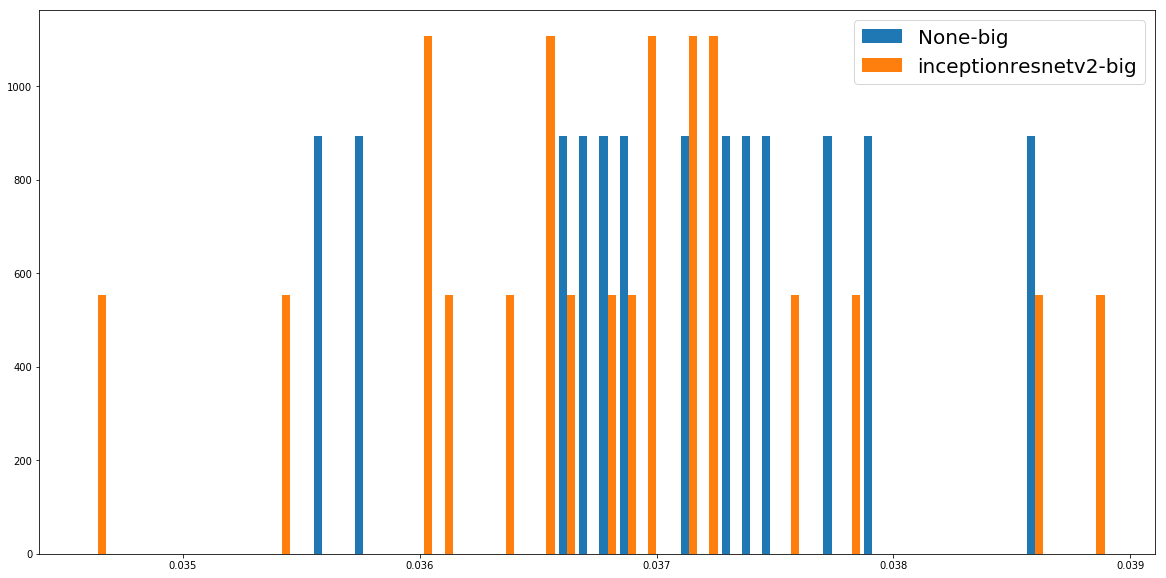

In [15]:
#df.hist(bins=100, column='val_mean_squared_error', by='image_function', figsize=(20,10), density=True, histtype='bar')
#plt.figure()

df_grouped = df.groupby('marker')
labels, vals = zip(*[(name, group['val_mean_squared_error']) for name, group in df_grouped])
print(labels)

#np.random.seed(19680801)

#for n, group in df_grouped:
#    print(n)
    #print(group['val_mean_squared_error'])

#colors = ['red', 'tan', 'lime']
plt.figure(1, figsize=(20,10))
n, bins, patches = plt.hist(vals, bins = 50, density=True, histtype='bar', label=labels)#, color=colors, label=colors)
ax = plt.gca()
ax.legend(prop={'size': 20})
#print(type(fig))
#fig.axes[0].legend(prop={'size': 10})
#ax0, ax1, ax2, ax3 = axes.flatten()

#print(len(fig.axes))
#fig.axes[0].hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#fig.axes[0].legend(prop={'size': 10})
#fig.axes[0].set_title('bars with legend')


Text(0.5,0.98,'')

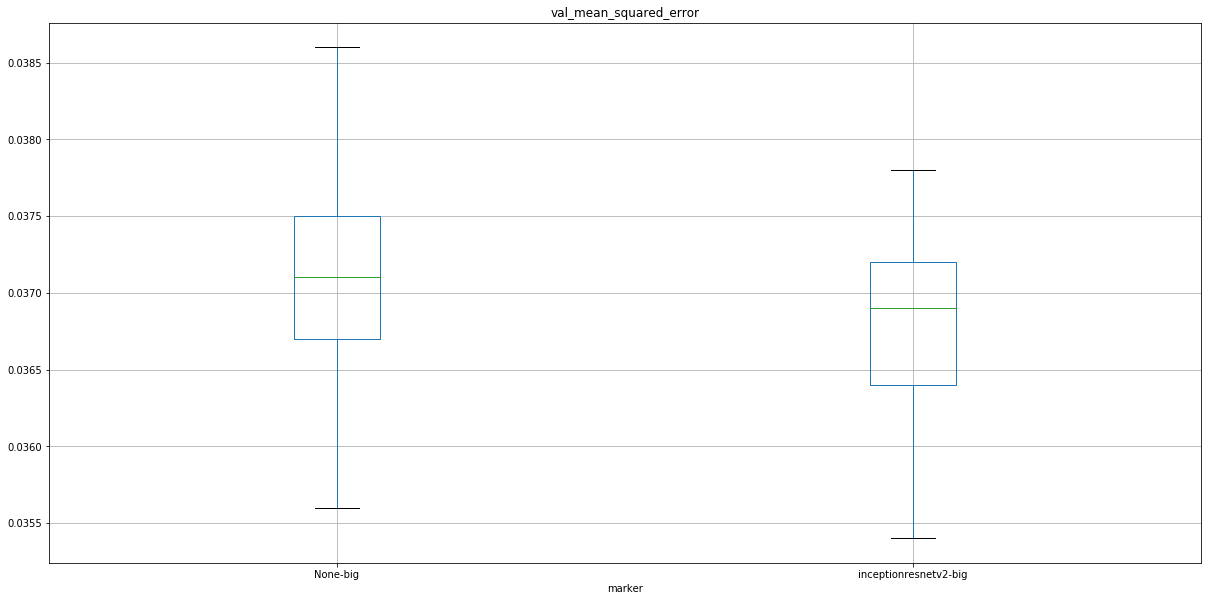

In [16]:
axes = df.boxplot(column='val_mean_squared_error', by='marker', showfliers=False, figsize=(20,10))
#fig = np.asarray(axes).reshape(-1)[0].get_figure()
#np.asarray(axes).shape
fig = axes.get_figure()
fig.suptitle('')


In [6]:
np.asarray(axes).shape


()

In [13]:
pd.set_option('display.max_colwidth', -1)
df_wimages_big.sort_values(by=['val_mean_squared_error', 'model-dir'])

,time,val_mean_squared_error,epochs,marker,batch-size,dev-dir,feature-shapes,image-embedding-function,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
16,2018-06-30 14:02:55,0.0346,8,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/16,100,7,16,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
0,2018-06-29 14:08:18,0.0354,7,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/0,100,7,0,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
21,2018-06-30 23:01:55,0.0360,11,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/21,100,7,21,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
6,2018-06-30 00:08:29,0.0360,12,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/6,100,7,6,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
13,2018-06-30 10:05:58,0.0361,12,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30}

In [12]:
pd.set_option('display.max_colwidth', -1)
df_noimages_big.sort_values(by=['val_mean_squared_error', 'model-dir'])

,time,val_mean_squared_error,epochs,marker,batch-size,dev-dir,feature-shapes,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
2,2018-07-01 22:50:47,0.0356,10,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/2,100,7,2,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
11,2018-07-02 13:24:35,0.0358,6,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/11,100,7,11,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
12,2018-07-02 15:09:52,0.0366,10,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/12,100,7,12,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
9,2018-07-02 11:06:16,0.0367,8,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/9,100,7,9,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
4,2018-07-02 03:01:45,0.0368,8,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/4,100,7,4,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/cli